<h1 style="color: #FF8C00;">About Lines, Edges and Colors</h1>

* How do Humans (and machines) percieve the world; a brief introduction to Computer Vision.

<h3 style="color: #FF6347;">What is Computer Vision?</h3>

* In a **nutshell**, another buzzword for something we can eventually understand.


* Also, Computer Vision (CV) is a subfield of artificial intelligence that focuses on teaching computers to see and interpret the world as humans do. It is inspired by our understanding of biological vision systems in animals.

<h3 style="color: #FF6347;">How Computer Vision started:</h3>

With a cat.

<div style="text-align: justify">In 1959 two scientists, Hubel and Wiesel conducted an experiment with a cat by placing it In a harness and inserting an electrode into its primary visual cortex. Then, they showed it some images on a screen. The cat's visual cortex did not respond to any of the images. But the EUREKA moment came later, as they turn off the screen, the cat’s neurons responded to a simple horizontal line of light appeared. </div>

This investigation set up the basics for Computer Vision and to understand animal vision, as it suggested that we perceive the world as a combination of **<u>lines</u>**  and **<u>edges</u>**  which ultimately form more complex shapes.

<h3 style="color: #FF6347;">How Human Vision works:</h3>

Human vision relies on **eyes** and the **brain** **-->** We capture images of our surroundings, and our brain works to interpret and understand these images.

The human **eye** captures light and focuses it onto the retina, which contains **light-sensitive cells** called rods and cones.
* **Rods**:  Responsible for low-light vision.
* **Cones**: Processes colour vision and details.

The retina converts light into **electrical signals** through these cells, and those electric pulses travel through the optic nerve and finally are transmitted to the **brain**.

The **brain** processes this signal in our **primary visual cortex**, located in the **occipital lobe**, which is responsible for... basic **<u>lines</u>** and <u>**edge**</u> detection.

Other parts of human visual processing occurs in other regions of the brain to recognize objects, faces, shapes, and more complex visual information.

<h3 style="color: #FF6347;">How Machine Vision works:</h3>

The **“eye”** of Machine Vision works by converting digital images into numerical representations that can be processed and analysed.
* Any digital image can be converted to a NumPy array, which translates the image as a matrix of pixels, with each pixel containing the intensity values of three basic colour channels: red, green, and blue.
* To simplify processing and reduce computational requirements, the image is often converted to grayscale. The grayscale pixel values represent intensity levels ranging from 0 (black) to 255 (white).

The **“brain”** of Machine Vision works by using ”**Convolutional Neural Networks”** (CNNs) and Deep Learning techniques (DL), both of which are deeply rooted in how we compute information with our own brain.

* CNNs aim to replicate the hierarchical structure of the brain by processing the images in a series of layers and using weights to adjust the importance of the input features. 
* During the training process, each layer focuses on specific features like edges and lines. 
* Weights are then updated in each loop, adding complexity to the process of finding patterns and features from the input-images.

CNNs are commonly used for human-like tasks like ”**image classification”**, **object detection”** and ”**segmentation”** (medical imaging, facial recognition, autonomous motion, for e.g).

<h3 style="color: #FF6347;">How to Start with it (an easy approach):</h3>

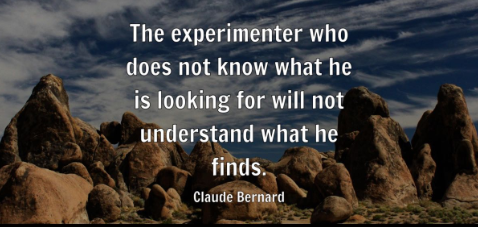

1.	**Define the problem and determine what you want to achieve with the image.**
2.	Acquire a digital image (photography, recording, digital scanner, cam…).
3.	Process the image using techniques like resizing, cropping, rotating, or converting to grayscale (depending on what you want to achieve).
4.	Have fun ! Feed the processed image into a CV model to interpret objects, features, and patterns.

For beginners, **OpenCV** and **scikit-image** are excellent libraries to start with due to their versatility and the availability of extensive options **-->** Let’s walk through it :)

<h1 style="color: #00BFFF;">00 |</h1>

<h3 style="color: #0099CC;">Libraries</h3>

In [1]:
# 📚 Basic libraries
import numpy as np # images will be converted to a numpy array
from matplotlib import pyplot as plt # 2D visualizations
import warnings
warnings.filterwarnings("ignore")

# 🌐 Computer Vision 
import cv2 # computer vision management 
from skimage.transform import rescale, resize, downscale_local_mean # computer vision pre-processing

# 🤖 Computer Vision Machine Learning

# Circular and Elliptical Hough Transforms\
from skimage import data, color
from skimage.transform import hough_circle, hough_circle_peaks # 
from skimage.feature import canny
from skimage.draw import circle_perimeter
from skimage.util import img_as_ubyte

# Trainable segmentation using local features and random forests
from skimage import data, segmentation, feature, future
from sklearn.ensemble import RandomForestClassifier
from functools import partial

<h3 style="color: #0099CC;">Reading the Data</h3>

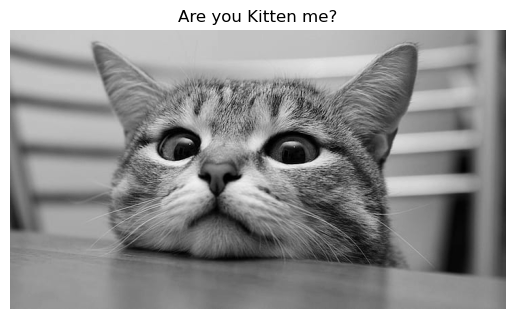

In [2]:
# Load your own image
image = cv2.imread('cat.jpg', 0) # 0 for grayscale

# Plotting it in a Euclidean space
plt.imshow(image, 'gray') # image, grayscale color
plt.title('Are you Kitten me?') # title
plt.axis('off') # removing the axis
plt.show()

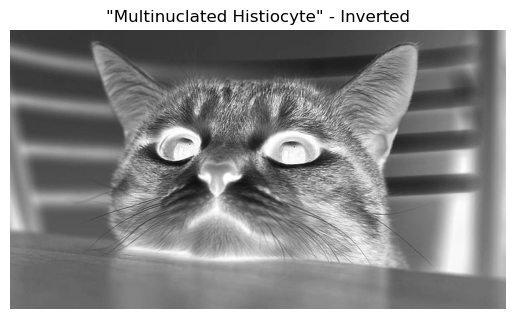

In [3]:
# Inverted images colors (dark background and bridge contorns make it easier for Hough transform)
image = ~image # We use the todle to invert the image colors

# Showing the image
plt.imshow(image, 'gray') # image, grayscale color
plt.title('"Multinuclated Histiocyte" - Inverted') # title
plt.axis('off') # removing the axis
plt.show()

In [4]:
from skimage.transform import hough_line, hough_line_peaks # Hough transform

In [5]:
# Classic straight-line Hough transform
# You can increase/decrease  the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 53, 800, endpoint=False)

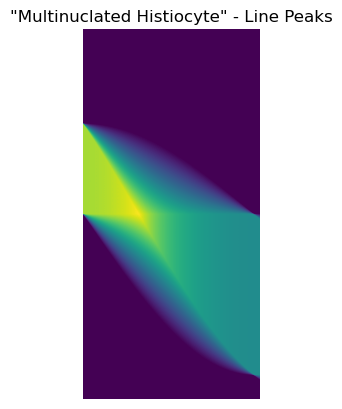

In [6]:
# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.imshow(hspace) # image, grayscale color
plt.title('"Multinuclated Histiocyte" - Line Peaks') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Pixel matrix</h3>

import sys # system parameters
np.set_printoptions(threshold=sys.maxsize) # ⚙️ to display all rows in a numpy array

# Convert the image to a numpy array (pixel matrix)
pixel_matrix = np.array(image)

# Display the pixel matrix
print(pixel_matrix)

<h1 style="color: #00BFFF;">01 | Data Pre-processing</h1>

<h3 style="color: #0099CC;">Inverting the image</h3>

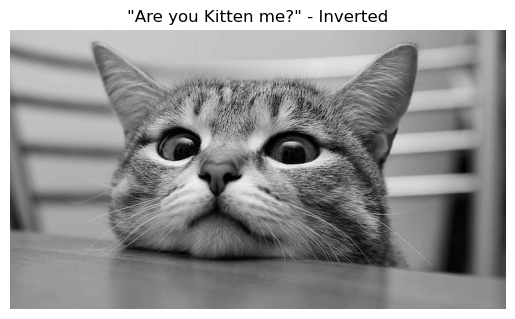

In [9]:
# Inverted images colors (dark background and bridge contorns make it easier to detect edges transform)
image = ~image # We use the todle to invert the image colors

# Showing the image
plt.imshow(image, 'gray') # image, grayscale color
plt.title('"Are you Kitten me?" - Inverted') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Rescaling the image</h3>

* Reescaling allow us to change the size of an image while maintening its aspect ratio.
* Useful to ensure that all images for testing and training have the same dimensions.

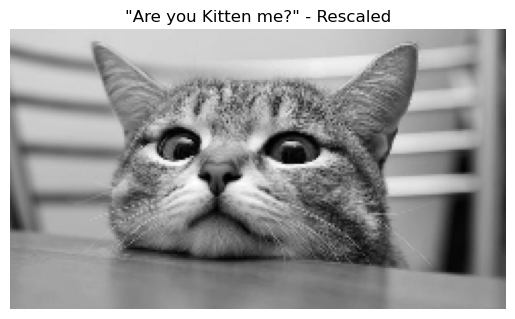

In [10]:
img_rescaled = rescale(image, 1.0 / 3.0, anti_aliasing=False) # ⚙️ play with the settings
# 1 / 2 = 50%
# 1 / 4 = 20%

# Showing the image
plt.imshow(img_rescaled, 'gray') # image, grayscale color
plt.title('"Are you Kitten me?" - Rescaled') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Resize the image</h3>

* Also self-explanatory, it's used to normalize the size of images in a dataset.

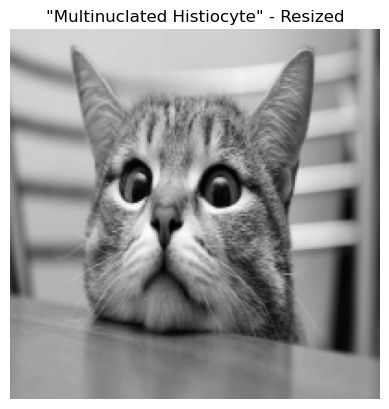

In [11]:
img_resized = resize(image, (200, 200), # ⚙️ play with the settings
                     anti_aliasing = True)

# Showing the image
plt.imshow(img_resized, 'gray') # image, grayscale color
plt.title('"Multinuclated Histiocyte" - Resized') # title
plt.axis('off') # removing the axis
plt.show()

<h3 style="color: #0099CC;">Downscale the image</h3>

* Downscaling is odd, similar to reescaling; the dimensions of the image are reduced, but it can also lead to quality lost.
* It's usually followed by upscaling to retain important details from an image.

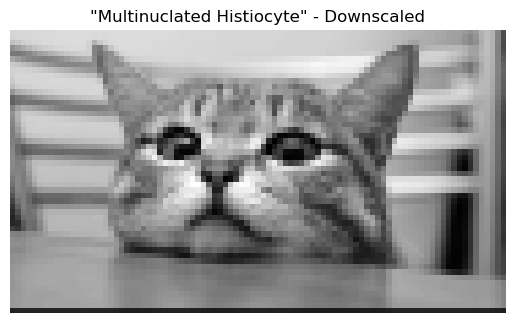

In [12]:
img_downscaled = downscale_local_mean(image, (8, 8)) # ⚙️ play with the settings

# Showing the image
plt.imshow(img_downscaled, 'gray') # image, grayscale color
plt.title('"Multinuclated Histiocyte" - Downscaled') # title
plt.axis('off') # removing the axis
plt.show()

<h1 style="color: #00BFFF;">01 | Morphological transformations</h1>

<h2 style="color: #008080;">Circular and Elliptical Hough Transforms</h2>

The straight line is normally paramaterized as: y = mx + b,

Where **m** is the slope and **b** is the intercept.

NOTE: **m** goes to infinity for vertical lines

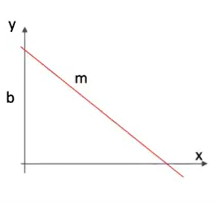

This line can also be represented as:

r = r cos 0 + y sin 0

Where **r** is the distance from the origin to the closest point on the straight line. (r, 0) corresponds to the Hough space representation of a line.

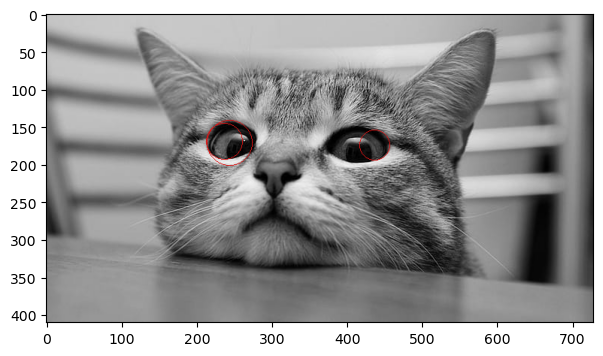

In [13]:
# Load picture and detect edges
edges = canny(image, sigma=3, low_threshold=10, high_threshold=50)


# Detect two radii
hough_radii = np.arange(20, 35, 2)
hough_res = hough_circle(edges, hough_radii)

# Select the most prominent 3 circles
accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii,
                                           total_num_peaks=3)

# Draw them
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 4))
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(cy, cx, radii):
    circy, circx = circle_perimeter(center_y, center_x, radius,
                                    shape=image.shape)
    image[circy, circx] = (220, 20, 20)

ax.imshow(image, cmap=plt.cm.gray)
plt.show()

<h2 style="color: #008080;">Trainable segmentation using local features and random forests</h2>

pip install pooch


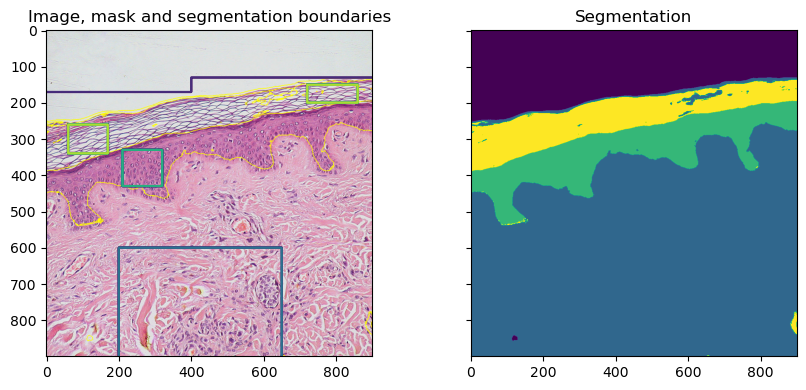

In [14]:
full_img = data.skin()

img = full_img[:900, :900]

# Build an array of labels for training the segmentation.
# Here we use rectangles but visualization libraries such as plotly
# (and napari?) can be used to draw a mask on the image.
training_labels = np.zeros(img.shape[:2], dtype=np.uint8)
training_labels[:130] = 1
training_labels[:170, :400] = 1
training_labels[600:900, 200:650] = 2
training_labels[330:430, 210:320] = 3
training_labels[260:340, 60:170] = 4
training_labels[150:200, 720:860] = 4

sigma_min = 1
sigma_max = 16
features_func = partial(feature.multiscale_basic_features,
                        intensity=True, edges=False, texture=True,
                        sigma_min=sigma_min, sigma_max=sigma_max,
                        channel_axis=-1)
features = features_func(img)
clf = RandomForestClassifier(n_estimators=50, n_jobs=-1,
                             max_depth=10, max_samples=0.05)
clf = future.fit_segmenter(training_labels, features, clf)
result = future.predict_segmenter(features, clf)

fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(9, 4))
ax[0].imshow(segmentation.mark_boundaries(img, result, mode='thick'))
ax[0].contour(training_labels)
ax[0].set_title('Image, mask and segmentation boundaries')
ax[1].imshow(result)
ax[1].set_title('Segmentation')
fig.tight_layout()

<h3 style="color: #FF6347;">References</h3>

* isahit, "Why to use grayscale conversion during image processing," [Online]. Available: https://www.isahit.com/blog/why-to-use-grayscale-conversion-during-image-processing#:~:text=This%20is%20because%20grayscale%20compressors,Colour%20complexity%20is%20also%20reduced. [Accessed 25 April 2023].
* E. B. P. F. et al., "Effect of grayscale conversion on the diagnostic quality of digital images," in Veterinary Clinical Pathology, vol. 42, no. 3, pp. 321-327, Sep. 2013. DOI: 10.1111/vcp.12046
* V7 Labs, "What is computer vision?" [Online]. Available: https://www.v7labs.com/blog/what-is-computer-vision#:~:text=In%20its%20most%20basic%20form,and%20detection%2C%20and%20image%20segmentation. [Accessed 25 April 2023].
* W3Schools, "Artificial Intelligence - AI," [Online]. Available: https://www.w3schools.com/ai/. [Accessed 25 April 2023].
* J. Brownlee, "Object Recognition with Deep Learning," Machine Learning Mastery, [Online]. Available: https://machinelearningmastery.com/object-recognition-with-deep-learning/. [Accessed 25 April 2023].
* A. Sharma, "Computer Vision and Image Processing," The Startup, Medium, [Online]. Available: https://medium.com/swlh/computer-vision-and-image-processing-470ceea06b91. [Accessed 25 April 2023].
* R. Martin, "Performing object detection without localization," Stack Exchange, [Online]. Available: https://stats.stackexchange.com/questions/532998/performing-object-detection-without-localization. [Accessed 25 April 2023].

<h3 style="color: #FF6347;">Acknowledgments</h3>

* **Nicole:** Grammar corrections and moral support.
* **Xisca:** Motivation.
* **Sabina:** Source of inspiration.

<h3 style="color: #FF6347;">Link to the presentation</h3>

https://www.canva.com/design/DAFgzfJbjt4/uvIU_0-FJWcH4NAjImuv3A/edit?utm_content=DAFgzfJbjt4&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton